In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import math


# *Cleaning data :*

In [3]:
titanic_dataset=pd.read_csv("/kaggle/input/test-file/tested.csv")
titanic_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
print("# of passengers in original data: " + str(len(titanic_dataset.index)))

# of passengers in original data: 418


# Analysing data 

* counting the survivors

<Axes: xlabel='Survived', ylabel='count'>

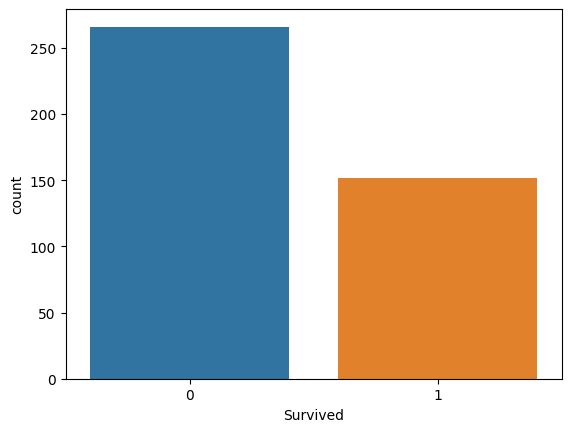

In [5]:
sb.countplot(x="Survived",data=titanic_dataset)

* counting survivors based on gender (female and male )

In [6]:
print(titanic_dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

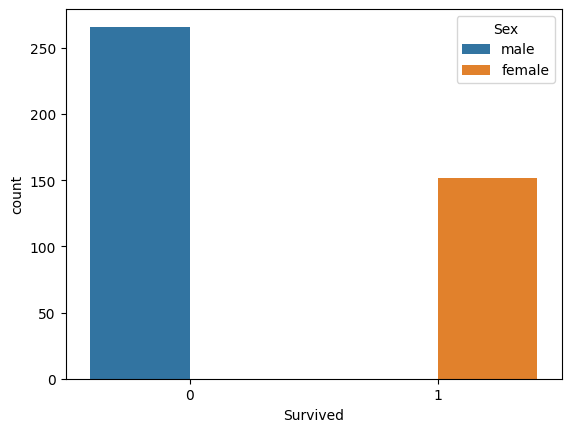

In [7]:
sb.countplot(x='Survived',hue='Sex',data=titanic_dataset)

1. With this we can interpret that females were first helped which resulted in
    their survival
2. As we don't have real data as of who survived due to which it can be seen as     an error in data 

([<matplotlib.axis.XTick at 0x784b93dc9e70>,
 [Text(0, 0, 'Did Not Survive'), Text(1, 0, 'Survived')])

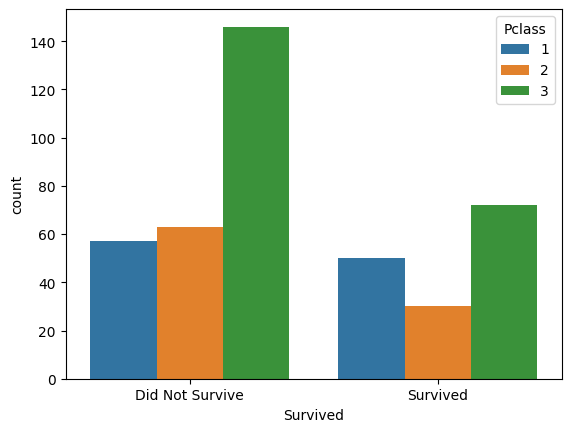

In [8]:
sb.countplot(x='Survived',hue='Pclass',data=titanic_dataset)
plt.xticks(ticks=[0, 1], labels=["Did Not Survive", "Survived"])

* Most people who died were from 3rd class.
* 1st class passengers had the highest survival rate.
* 2nd class survival was in between.

<Axes: ylabel='Frequency'>

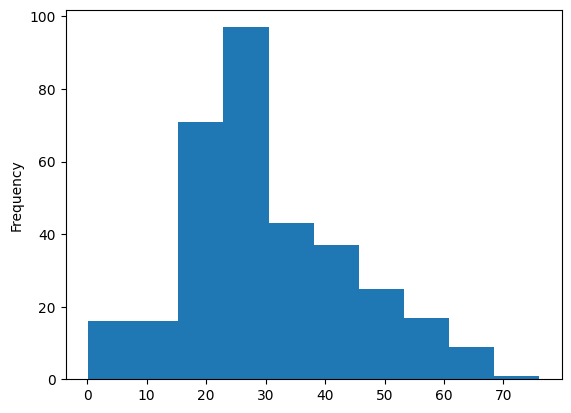

In [9]:
titanic_dataset["Age"].plot.hist()


In [10]:
titanic_dataset["Age"].skew()

0.4573612871503845

Interpretation:
* Since the value is greater than 0, it indicates that the dataset has a longer
  tail on the right (higher ages).
* However, 0.457 is close to 0, meaning the skewness is not very strong—it's       only moderately right-skewed.
* This suggests that there were more younger passengers, but a few older           passengers (higher ages) caused a slight rightward tail.

In [11]:
titanic_dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


# Train data and test data 

* build model on train data
* predict output on test data 

* To evaluate a machine learning model's performance, we must train it on one      part of the dataset (training set) and test it on unseen data (test set). 

In [12]:
from sklearn.model_selection import train_test_split

Training data = 70%
Testing data  = 30%

In [13]:
x=titanic_dataset.drop("Survived" ,axis=1)
y=titanic_dataset["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [15]:
print(X_train.dtypes)

NameError: name 'X_train' is not defined

In [ ]:
import numpy as np

# Find columns that are still object type
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Check if there are any unexpected string values
for col in non_numeric_cols:
    print(f"Unique values in {col}: {X_train[col].unique()}")


In [ ]:
print(X_train.isnull().sum().sum())  # Total missing values
print(X_test.isnull().sum().sum())  # Total missing values


In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


In [ ]:
print(X_train.head())
print(X_train.dtypes)

In [ ]:
print(X_train.select_dtypes(include=['object']).columns)


In [ ]:
print(X_train.applymap(lambda x: isinstance(x, str)).sum())
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [ ]:
print(X_train.isnull().sum().sum())
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


In [ ]:
model.fit(X_train, y_train)


This means the model couldn't find the optimal solution in the given number of iterations.So we are increasing iteration

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Increase to 1000 or more
model.fit(X_train, y_train)


In [ ]:
predictions=model.predict(x_train)


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
# Align columns so both train and test have the same features
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
# Convert categorical variables into one-hot encoding
X_test = pd.get_dummies(X_test, drop_first=True)

# Align test set columns with train set columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Now make predictions
y_pred = model.predict(X_test)


In [ ]:
predictions=model.predict(x_test)

In [ ]:
X_test = pd.get_dummies(X_test, drop_first=True)


In [ ]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
# Apply one-hot encoding to X_test
X_test = pd.get_dummies(X_test, drop_first=True)

# Align test set columns with train set columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Now make predictions
predictions = model.predict(X_test)


In [ ]:
print("Columns in X_train but not in X_test:", set(X_train.columns) - set(X_test.columns))
print("Columns in X_test but not in X_train:", set(X_test.columns) - set(X_train.columns))


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


In [ ]:
# Check if column names are identical in order
print((X_train.columns == X_test.columns).all())  


In [ ]:
print(type(X_test))


In [ ]:
print(model.feature_names_in_)
print(X_train.columns)


In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [ ]:
X_train.columns = X_train.columns.str.strip()
X_test.columns = X_test.columns.str.strip()


In [ ]:
print(X_train.columns.duplicated().sum())  
print(X_test.columns.duplicated().sum())  


In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(model.feature_names_in_)
print(X_train.columns)
print(X_test.columns)

In [ ]:
import pandas as pd

# Sample DataFrame (replace with your actual data)
df = pd.DataFrame({'Name': [
    'Braund, Mr. Owen Harris',
    'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
    'Heikkinen, Miss. Laina',
    'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
    'Allen, Mr. William Henry'
]})

# Extract titles using regex
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.')

# Standardizing uncommon titles
title_mapping = {
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs",
    "Sir": "Mr",
    "Lady": "Mrs",
    "Countess": "Mrs",
    "Dona": "Mrs",
    "Jonkheer": "Mr",
    "Capt": "Mr",
    "Col": "Mr",
    "Don": "Mr",
    "Dr": "Mr",
    "Major": "Mr",
    "Rev": "Mr"
}
df['Title'] = df['Title'].replace(title_mapping)

# One-hot encoding the Title
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

print(df)


In [ ]:
import pandas as pd

# Sample DataFrame (replace with your actual data)
df = pd.DataFrame({'Name': [
    'Braund, Mr. Owen Harris',
    'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
    'Heikkinen, Miss. Laina',
    'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
    'Allen, Mr. William Henry'
]})

# Extract titles using regex
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.')

# Standardizing uncommon titles
title_mapping = {
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs",
    "Sir": "Mr",
    "Lady": "Mrs",
    "Countess": "Mrs",
    "Dona": "Mrs",
    "Jonkheer": "Mr",
    "Capt": "Mr",
    "Col": "Mr",
    "Don": "Mr",
    "Dr": "Mr",
    "Major": "Mr",
    "Rev": "Mr"
}
df['Title'] = df['Title'].replace(title_mapping)

# One-hot encoding the Title
df = pd.get_dummies(df, columns=['Title'])

# Convert boolean to integer (optional but recommended)
df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)

print(df)


In [ ]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'Name': [
    'Braund, Mr. Owen Harris',
    'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
    'Heikkinen, Miss. Laina',
    'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
    'Allen, Mr. William Henry'
]})

# Extract title using regex
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.')

# Standardizing uncommon titles
title_mapping = {
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs",
    "Sir": "Mr",
    "Lady": "Mrs",
    "Countess": "Mrs",
    "Dona": "Mrs",
    "Jonkheer": "Mr",
    "Capt": "Mr",
    "Col": "Mr",
    "Don": "Mr",
    "Dr": "Mr",
    "Major": "Mr",
    "Rev": "Mr"
}
df['Title'] = df['Title'].replace(title_mapping)

# One-hot encoding the Title
df = pd.get_dummies(df, columns=['Title'], dtype=int)  # ✅ Explicitly set dtype=int

print(df)


In [ ]:
print(df[['Name', 'Title']])


In [ ]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Check if Title is extracted correctly
print(df[['Name', 'Title']].head())


In [ ]:
title_dummies = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, title_dummies], axis=1)


In [ ]:
print(df[['Title', 'Title_Miss', 'Title_Mr', 'Title_Mrs']].head())


In [ ]:
# Drop duplicate title columns if they exist
df = df.loc[:, ~df.columns.duplicated()]


In [ ]:
# Extract Title
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# One-hot encode Titles
title_dummies = pd.get_dummies(df['Title'], prefix='Title', dtype=int)

# Merge and avoid duplication
df = df.drop(columns=['Title'], errors='ignore')  # Remove 'Title' if it already exists
df = pd.concat([df, title_dummies], axis=1)

# Verify the final result
print(df.head())


In [ ]:
# Drop existing Title-related columns if they exist
df = df.loc[:, ~df.columns.duplicated()]


In [ ]:
import pandas as pd

# Sample data
data = {
    'Name': [
        'Braund, Mr. Owen Harris',
        'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
        'Heikkinen, Miss. Laina',
        'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
        'Allen, Mr. William Henry'
    ]
}

df = pd.DataFrame(data)

# Extract Title
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# One-hot encode Titles
title_dummies = pd.get_dummies(df['Title'], prefix='Title', dtype=int)

# Drop duplicate columns before merging
df = df.loc[:, ~df.columns.duplicated()]

# Merge one-hot encoded columns
df = pd.concat([df, title_dummies], axis=1)

# Drop the original 'Title' column
df = df.drop(columns=['Title'], errors='ignore')

# Print final dataframe
print(df)


In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

Therefore , 
1. True Positive =80
2. False Negative =5
3. False Positive =33
4. True Negative = 8

# Accuracy  of model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)